#  Datasets & NumPy

## Introduction

> ***Note:*** _This can be a pair programming activity or done independently._

From previous days, you're already familiar with:

- Fundamental python concepts
- Iteration and looping
- Manipulation of dictionaries and lists
- Functions

Today we've added a lot more concepts on top of that:

- Numpy and scipy statistics functions
- List comprehensions
- Reading in csv files with python
- Basic statistical concepts on descriptive statistics and distributions

In this lab you're going to combine everything we've learned so far!

#### Requirements

- Load the "sales_data.csv" with python
- Construct a dictionary version of the data, with keys as column names and values as column data
- Write a function to describe measures of central tendency and measures of variance for the data
- Plot the data distributions and think about the skewness (or symmetry) of the data.


#### Starter Code

Here is the [dataset](./resources/sales_info.csv) and you can start with the code below.

## Lab 3.4: csvs, functions, numpy, and distributions

Run the cell below to load the required packages and set up plotting in the notebook!

In [6]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline

### Sales data

For this lab we will be using a truncated version of some sales data that we will be looking at further down the line in more detail. 

The csv has about 200 rows of data and 4 columns. The relative path to the csv ```sales_info.csv``` is provided below. If you copied files over and moved them around, this might be different for you and you will have to figure out the correct relative path to enter.

In [7]:
sales_csv_path = 'resources/sales_info.csv'

#### 1. Loading the data

Set up an empty list called ```rows```.

Using the pattern for loading csvs we learned earlier, add all of the rows in the csv file to the rows list.

For your reference, the pattern is:
```python
with open(my_csv_path, 'r') as f:
    reader = csv.reader(f)
    ...
```

Beyond this, adding the rows in the csv file to the ```rows``` variable is up to you.

In [57]:
with open(sales_csv_path, 'rb') as f:
    reader = csv.reader(f)
    rows = [row for row in reader]

##### 2. Separate header and data

The header of the csv is contained in the first index of the ```rows``` variable, as it is the first row in the csv file. 

Use python indexing to create two new variables: ```header``` which contains the 4 column names, and ```data``` which contains the list of lists, each sub-list representing a row from the csv.

Lastly, print ```header``` to see the names of the columns.

In [58]:
head = rows[:1]
data = rows[1:]

#### 3. Create a dictionary with the data

Use loops or list comprehensions to create a dictionary called ```sales_data```, where the keys of the dictionary are the column names, and the values of the dictionary are lists of the data points of the column corresponding to that column name.

In [59]:
head[0]

['volume_sold', '2015_margin', '2015_q1_sales', '2016_q1_sales']

In [94]:
sales_data = {
    'volume_sold': [row [0] for row in data],
    'margin': [row [1] for row in data],
    'q1_sales_2015': [row [2] for row in data],
    'q1_sales_2016': [row [3] for row in data]
    }


    
    
    

**3.A** Print out the first 10 items of the 'volume_sold' column.

In [95]:
sales_data['volume_sold'][:10]

['18.4207604861',
 '4.77650991918',
 '16.6024006077',
 '4.29611149826',
 '8.15602328201',
 '5.00512242518',
 '14.60675',
 '4.45646649485',
 '5.04752965097',
 '5.38807023767']

#### 4. Convert data from string to float

As you can see, the data is still in string format (which is how it is read in from the csv). For each key:value pair in our ```sales_data``` dictionary, convert the values (column data) from string values to float values.

In [96]:
sales_data = {
    'volume_sold': [float(row [0]) for row in data],
    'margin': [float(row [1]) for row in data],
    'q1_sales_2015': [float(row [2]) for row in data],
    'q1_sales_2016': [float(row [3]) for row in data]
    }



#### 5. Write function to print summary statistics

Now write a function to print out summary statistics for the data.

Your function should:

- Accept two arguments: the column name and the data associated with that column
- Print out information, clearly labeling each item when you print it:
    1. Print out the column name
    2. Print the mean of the data using ```np.mean()```
    3. Print out the median of the data using ```np.median()```
    4. Print out the mode of the **rounded data** using ```stats.mode()```
    5. Print out the variance of the data using ```np.var()```
    6. Print out the standard deviation of the data using ```np.std()```
    
Remember that you will need to convert the numeric data from these function to strings by wrapping them in the ```str()``` function.

In [99]:
def statistic (column, data):
    mean = np.mean(data[column])
    median = np.median(data[column])
    rounded = [round(n,0) for n in data[column]]
    mode = stats.mode(rounded)
    variance = np.var(data[column])
    std = np.std(data[column])
    print 'column: '+ column
    print 'mean: ' + str(mean) 
    print 'median: ' + str(median)
    print 'mode: ' + str(mode)
    print 'variance: '+ str(variance)
    print 'std: '+str(std)
            

**5.A** Using your function, print the summary statistics for ''volume_sold''

In [100]:
statistic('volume_sold',sales_data)

column: volume_sold
mean: 10.018684079
median: 8.16634551564
mode: ModeResult(mode=array([ 8.]), count=array([28]))
variance: 84.1299652005
std: 9.1722388325


**5.B** Using your function, print the summary statistics for '2015_margin'

In [101]:
statistic('margin',sales_data)

column: margin
mean: 46.8588951379
median: 36.5621438181
mode: ModeResult(mode=array([ 35.]), count=array([9]))
variance: 2016.06166296
std: 44.9005753077


**5.C** Using your function, print the summary statistics for '2015_q1_sales'

In [102]:
statistic('q1_sales_2015',sales_data)


column: q1_sales_2015
mean: 154631.6682
median: 104199.41
mode: ModeResult(mode=array([ 4152.]), count=array([1]))
variance: 47430301462.3
std: 217784.989066


**5.D** Using your function, print the summary statistics for '2016_q1_sales'

In [103]:
statistic('q1_sales_2016',sales_data)

column: q1_sales_2016
mean: 154699.17875
median: 103207.2
mode: ModeResult(mode=array([ 3536.]), count=array([1]))
variance: 47139411653.4
std: 217116.124812


#### 6. Plot the distributions

We've provided a plotting function below called ```distribution_plotter()```. It takes two arguments, the name of the column and the data associated with that column.

In individual cells, plot the distributions for each of the 4 columns. Do the data appear skewed? Symmetrical? If skewed, what would be your hypothesis for why?

In [109]:
def distribution_plotter(column, dictionary):
    data = dictionary[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

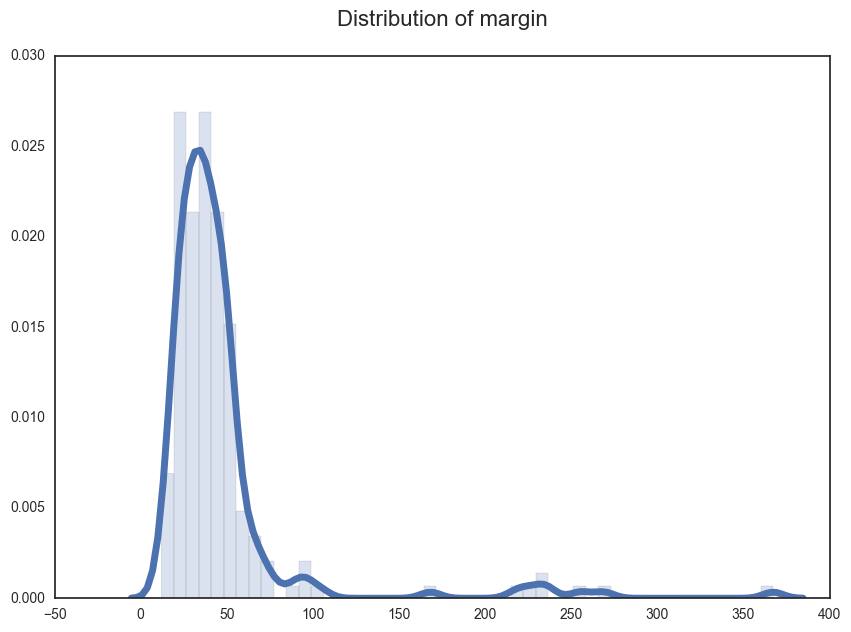

In [112]:
distribution_plotter('margin',sales_data)